In [1]:
# -*- coding: utf-8 -*-
"""
ITCS494 Machine Learning
First semester 2020/2021
Lab 1. Linear Regression and Gradient Descent

Created on Thu Oct  8 14:31:22 2020
@author: Ramsha Khalid - UOB

Problem

Look at the following starter Google Colab notebook. https://colab.research.google.com/drive/1Hv_uxTXzQ_cAvvuuOmHL_CzXaDUqwxKI?usp=sharing
Make your own notebook in Colab or in Jupyter Notebook on your machine and solve the following problem.

Read the student data and use the midterm1 feature to test linear regression with one variable to predict the final grade. You should implement the linear regression algorithm from scratch (do not use the one available in Python libraries such as SciKit Learn). Write code to implement the cost function, the recursive descent functions, etc.

Then while running the recursive descent algorithm for finding the values of theta0 and theta1, draw a graph showing a scatter plot of the data with the resulting line.You can draw this for several steps to see how recursive descent gradually finds the minimum error/cost.

Save the file and upload it in the assignment as a Jupyter Notebook.
"""

#Imports
import matplotlib.pyplot as plt
import numpy as np

#Load dataset
dataset = np.genfromtxt('data.csv', delimiter=',', skip_header=1)

#Save mid marks in x and final marks in y
x = dataset[:, 2]
y = dataset[:, 5]

In [2]:
x,y

(array([26.  , 13.5 , 17.5 , 18.  , 22.5 , 12.  , 15.5 , 27.  , 19.5 ,
        17.5 , 21.  , 15.5 , 16.  , 21.  , 34.  , 13.5 , 22.  , 17.5 ,
        19.  , 29.5 , 27.5 , 23.5 , 28.5 , 16.  , 15.5 , 28.5 , 22.5 ,
        33.5 , 21.  , 28.5 , 26.  , 23.  , 19.5 , 25.  , 23.  , 21.5 ,
        24.  , 27.  , 26.5 , 27.  , 29.5 , 26.  , 23.  , 27.  , 14.  ,
        16.5 , 17.  , 13.5 , 12.  , 13.  , 13.5 , 14.  , 14.75, 18.75,
        14.5 , 18.5 , 13.5 , 23.5 , 13.  , 21.5 , 17.5 , 20.  , 19.  ,
        16.5 , 17.  , 20.5 , 19.5 , 23.  , 24.5 , 19.5 , 25.5 , 25.  ,
        26.5 , 27.  , 31.  , 31.  ]),
 array([55. , 45.5, 37. , 27.5, 40. , 36. , 40.5, 53.5, 46.5, 56. , 46. ,
        47.5, 38.5, 45. , 56.5, 39. , 65.5, 39. , 30. , 54.5, 53.5, 46. ,
        65.5,  0. ,  0. , 59.5,  0. , 65.5, 55.5, 61.5, 68.5, 52. , 63.5,
        65. , 53. , 53. , 57. , 46.5, 63.5, 54. , 55. , 51. , 65.5,  0. ,
        19. , 28. , 28.5, 29. , 34. , 25.5, 32.5, 36. , 29.5, 37.5, 38. ,
        45.5, 39.5, 35. 

Iteration  0
2.2769736842105264 1.2893259768966934
Error cost =  217.13723407865157



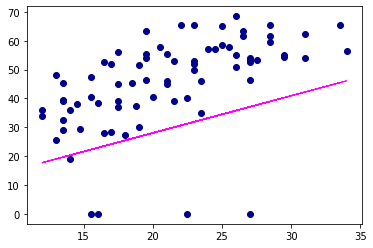

Iteration  10
4.196053111503499 1.881318662959527
Error cost =  92.1786892897742



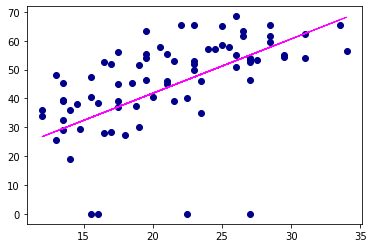

Iteration  20
4.94400327436173 1.856616657706555
Error cost =  91.53478071769003



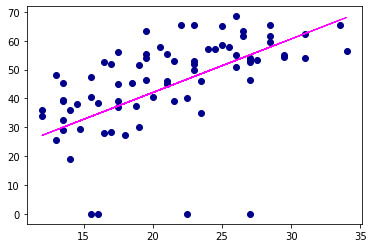

Iteration  30
5.586348333898721 1.8353951164856188
Error cost =  91.03778518147965



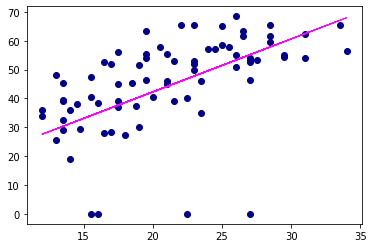

Iteration  40
6.138008957429543 1.8171695715874758
Error cost =  90.65214374108932



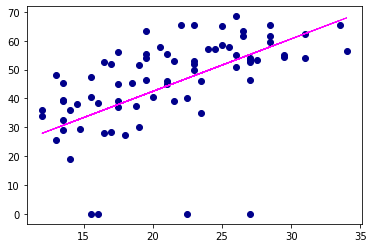

Iteration  50
6.6117877140636 1.8015170569208414
Error cost =  90.35132660918022



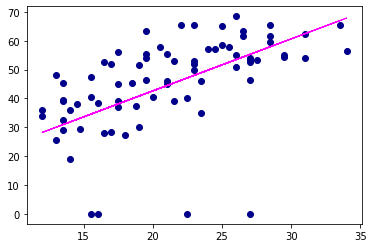

Iteration  60
7.01867974271892 1.7880743194466846
Error cost =  90.11538596783002



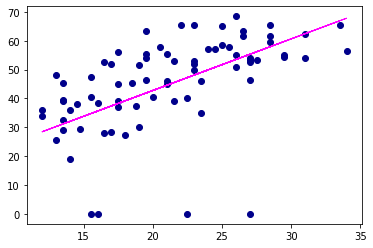

Iteration  70
7.368127920090703 1.7765293891496825
Error cost =  89.92928236164077



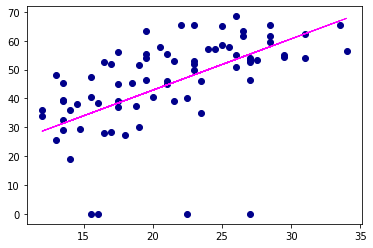

Iteration  80
7.668242004586334 1.7666143390478057
Error cost =  89.78164271065604



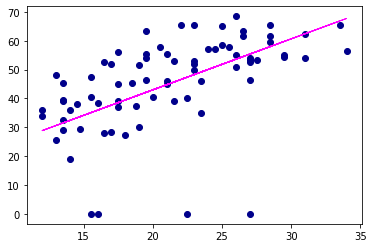

Iteration  90
7.925986842147256 1.7580990673230168
Error cost =  89.6638377439512



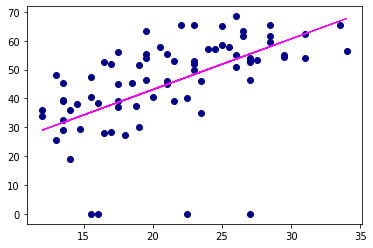

Iteration  99
8.126693275743166 1.7514682077676687
Error cost =  89.57785670504808



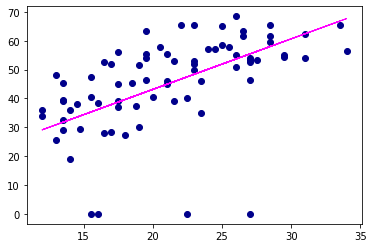

(8.126693275743166, 1.7514682077676687)

In [3]:
#number of dataset pairs
sets = len(x)

#Define functions
def hypothesis(theta0, theta1, x):
    return(theta0 + theta1 * x)

def t0Derivative(theta0, theta1, x, y):
    sum = 0
    for i in range(sets):
        sum = sum + (hypothesis(theta0, theta1, x[i]) - y[i])
    return sum / sets
        
def t1Derivative(theta0, theta1, x, y):
    sum = 0
    for i in range(sets):
        sum = sum + ((hypothesis(theta0, theta1, x[i]) - y[i]) * x[i])
        sum = sum / sets
    return sum

def computeCost(theta0, theta1):
    sum = 0
    for i in range(sets):
        sum = sum + np.power((hypothesis(theta0, theta1, x[i])- y[i]), 2)
    return sum / ( 2 * sets)

def gradientDescent(theta0, theta1):
    for i in range(iterations):
        
        temp0 = theta0 - alpha * t0Derivative(theta0, theta1, x, y)
        temp1 = theta1 - alpha * t1Derivative(theta0, theta1, x, y)
        
        theta0 = temp0
        theta1 = temp1
        
        if(i%10==0 or i==99):
            print("Iteration " , i)
            
            print(theta0, theta1)
            
            #compute cost
            cost = computeCost(theta0, theta1)
            print("Error cost = " , cost)
            print()
            
            #plot graph
            plt.scatter(x, y, color="darkblue")
            
            Y_pred = theta0 + theta1 * x
    
            plt.plot(x, Y_pred, color="magenta" , linestyle='-' , linewidth=1)
            plt.show()
        
    return theta0, theta1
        
#set values of theta
theta0 = 0
theta1 = 0
alpha = 0.05
iterations = 100

#Calculate gradient descent
gradientDescent(theta0, theta1)

